# 6. 使用 Scikit-learn 库中的 Olivetti faces 数据集，选取该数据集中的一张图像，使用SVD 进行压缩重构，观察和比较不同奇异值数量的压缩效果。

X shape: (400, 4096), y shape: (400,)


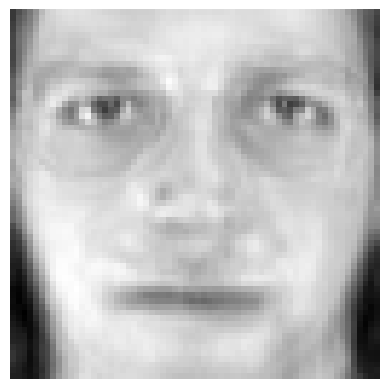

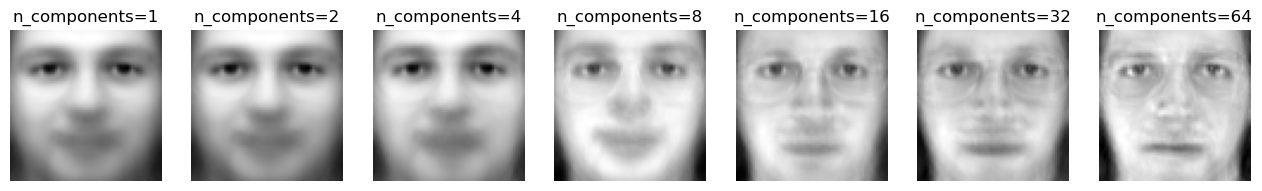

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import TruncatedSVD

# 加载 Olivetti faces 数据集
faces = datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target
print(f'X shape: {X.shape}, y shape: {y.shape}')

# 选取一张图像
image = X[0].reshape(64, 64)
plt.imshow(image, cmap='gray')
plt.axis('off')

#使用SVD压缩重构后显示
n_components = 64
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X)
X_svd_reconstructed = svd.inverse_transform(X_svd)
image_reconstructed = X_svd_reconstructed[0].reshape(64, 64)
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')

# 比较不同奇异值数量的压缩效果
n_components_list = [1, 2, 4, 8, 16, 32, 64]
plt.figure(figsize=(16, 8))
for i, n_components in enumerate(n_components_list):
    svd = TruncatedSVD(n_components=n_components)
    X_svd = svd.fit_transform(X)
    X_svd_reconstructed = svd.inverse_transform(X_svd)
    image_reconstructed = X_svd_reconstructed[0].reshape(64, 64)
    plt.subplot(1, len(n_components_list), i+1)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.axis('off')
    plt.title(f'n_components={n_components}')
plt.show()
